In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import numpy as np
import os
from scipy.signal import argrelextrema
from detecta import detect_peaks

from scipy import interpolate


In [64]:
baseline_accuracy=0.871874988079071

In [46]:
# the songhan values
df_snhn=pd.read_csv("results_sheet/song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])


#the thresholding on evolutionary weights values
df_mean_wt=pd.read_csv("results_sheet/02_py_mean_weighted.csv")
df_mean_wt=df_mean_wt.sort_values(by=["compression"])


In [47]:
manual_compressions=[0.037283, 0.110376, 0.147058, 0.292117, 0.400215, 0.471433, 0.5416, 0.609729, 0.642984, 
                     0.737723, 0.823288, 0.917499, 0.937824, 0.939476, 0.94189, 0.947356, 0.952241, 0.955961, 
                     0.958972, 0.961905, 0.964393, 0.966696, 0.968891, 0.970922, 0.972809, 0.974683, 0.976314, 
                     0.977867, 0.979354, 0.980672, 0.981851, 0.986757, 0.989879, 0.990068, 0.99027, 0.990501, 
                     0.993801, 0.993858, 0.993965, 0.994048, 0.994142, 0.994307, 0.995102, 0.995819, 0.996317, 
                     0.996721, 0.996721, 0.996952    
]
manual_val_top_1=[0.879395, 0.880957, 0.861621, 0.871094, 0.871582, 0.875, 0.879883, 0.87793, 0.872461, 0.876758, 
                  0.872363, 0.870605, 0.868945, 0.865234, 0.865234, 0.862988, 0.861621, 0.860645, 0.860156, 
                  0.843555, 0.839453, 0.839551, 0.837793, 0.77002, 0.765332, 0.763672, 0.760742, 0.759961, 0.756738,
                  0.756934, 0.755469, 0.606934, 0.503223, 0.50293, 0.499121, 0.499512, 0.434863, 0.445898, 0.447266,
                  0.447168, 0.447754, 0.438574, 0.28291, 0.1875, 0.184375, 0.184961, 0.184863, 0.097656    
    
]

df_snhn=pd.DataFrame({"compression":manual_compressions,
                                     "top_1":manual_val_top_1})


In [48]:
df_snhn

,compression,top_1
0,0.037283,0.879395
1,0.110376,0.880957
2,0.147058,0.861621
3,0.292117,0.871094
4,0.400215,0.871582
5,0.471433,0.875000
6,0.541600,0.879883
7,0.609729,0.877930
8,0.642984,0.872461
9,0.737723,0.876758


In [49]:







manual_compressions=[0.064668, 0.127392, 0.190491, 0.253656, 0.379129, 0.502529, 0.562757, 0.678426, 0.784278, 0.871883, 0.923682, 
 0.932432, 0.940188, 0.947006, 0.952929, 0.955075, 0.956155, 0.958202, 0.962193, 0.970786, 0.972076, 0.976866, 
 0.979371, 0.983506, 0.985216, 0.987861, 0.991444, 0.99385, 0.997722]


manual_val_top_1=[0.877344, 0.87998, 0.879883, 0.880762, 0.880859, 0.87998, 0.878809, 0.877441, 0.875781, 0.87207, 0.865723, 
 0.866797, 0.868359, 0.866895, 0.866406, 0.864355, 0.864355, 0.861719, 0.864355, 0.860547, 0.855469, 0.848926, 
 0.841797, 0.841309, 0.835645, 0.80625, 0.687109, 0.574707, 0.175098]


df_mean_wt_best_manual=pd.DataFrame({"compression":manual_compressions,
                                     "val_top_1":manual_val_top_1})


In [50]:
### BEzier on mean

# More involved method of getting better values

# Compression more than song han and accuracy better than the same

# df_snhn=pd.read_csv("results_sheet/song_hn.csv")
# df_snhn=pd.read_csv("results_sheet/song_hn.csv")
# df_snhn=df_snhn.sort_values(by=["compression"])

######################################################

df_bezier_on_mean=pd.read_csv("results_sheet/03_bezier_on_mean_03JanTry.csv")
df_bezier_on_mean=df_bezier_on_mean.sort_values(by=["range_params","upscale","upscale_method"],ascending=True)

df_bezier_on_mean=df_bezier_on_mean[["compression","val_top_1"]]
print(df_bezier_on_mean.shape)

# the songhan application
df_song_onBezmean=pd.read_csv("results_sheet/03song_hn_onBezMeans.csv")
df_song_onBezmean=df_song_onBezmean.sort_values(by=["compression"])
df_song_onBezmean=df_song_onBezmean[["compression","val_top_1"]]

# persisted bezier on mean
df_bezier_on_mean_pers=pd.read_csv("results_sheet/03_bezier_on_mean_pers_18JanTry.csv")
df_bezier_on_mean_pers=df_bezier_on_mean_pers.sort_values(by=["upscale","epoch_number"],ascending=True)
df_bezier_on_mean_pers=df_bezier_on_mean_pers[["compression","val_top_1"]]

df_bezier_on_mean=pd.concat([df_bezier_on_mean,df_song_onBezmean,df_bezier_on_mean_pers],ignore_index=True)

print(df_bezier_on_mean.shape)

######################################################


snhnComp=list(df_snhn.compression)
snhnAcc=list(df_snhn.top_1)


best_compression_acc={}
# best_compression_acc["range_params"]=[]
# best_compression_acc["upscale"]=[]
# best_compression_acc["upscale_method"]=[]
# best_compression_acc["epoch_number"]=[]

best_compression_acc["compression"]=[]
best_compression_acc["val_top_1"]=[]



for i in range(len(snhnComp)-1):
#     print(snhnComp[i],snhnComp[i+1])
    acc_snhn=snhnAcc[i]
    # find all data in bezierOnMean whose compression lies between given compression
    df_bezier_on_mean_in_between=df_bezier_on_mean[(df_bezier_on_mean["compression"]>snhnComp[i])&(df_bezier_on_mean["compression"]<=snhnComp[i+1])]
    # in this range, save the one with the maximum accuracy
    if df_bezier_on_mean_in_between.shape[0]>=1:
        # data exists, lets find the best
        df_bezier_on_mean_in_between=df_bezier_on_mean_in_between.sort_values(by=["val_top_1"],ascending=True)
        bez_acc=list(df_bezier_on_mean_in_between["val_top_1"])[-1]
        if bez_acc>=acc_snhn:
        
            best_compression_acc["compression"].append(list(df_bezier_on_mean_in_between["compression"])[-1])
            best_compression_acc["val_top_1"].append(list(df_bezier_on_mean_in_between["val_top_1"])[-1])
#             best_compression_acc["upscale"].append(list(df_bezier_on_mean_in_between["upscale"])[-1])
#             best_compression_acc["upscale_method"].append(list(df_bezier_on_mean_in_between["upscale_method"])[-1])
#             best_compression_acc["epoch_number"].append(list(df_bezier_on_mean_in_between["epoch_number"])[-1])
#             best_compression_acc["range_params"].append(list(df_bezier_on_mean_in_between["range_params"])[-1])

df_bez_mean_best=pd.DataFrame(best_compression_acc)
# print(df_bez_mean_best)


(87200, 2)
(89421, 2)


In [51]:
df_bez_mean_best

,compression,val_top_1
0,0.061583,0.891504
1,0.113687,0.892187
2,0.166196,0.891992
3,0.385670,0.893750
4,0.469130,0.888574
5,0.541411,0.895801
6,0.541629,0.894824
7,0.632764,0.890918
8,0.668037,0.895020
9,0.755415,0.894238


In [52]:
manual_compressions=[0.061583, 0.113687, 0.166196, 0.38567, 0.46913, 0.541411, 0.541629, 0.632764, 0.668037, 
                     0.755415, 0.854569, 0.92264, 0.939327, 0.94072, 0.943039, 0.958943, 0.960813, 0.963858, 
                     0.965312, 0.967878, 0.970951, 0.972982, 0.975519, 0.976776, 0.979029, 0.980429, 0.980944, 
                     0.985134, 0.987708, 0.99483, 0.995378, 0.995844, 0.99661]

manual_val_top_1=[0.891504, 0.892187, 0.891992, 0.89375, 0.888574, 0.895801, 0.894824, 0.890918, 0.89502, 0.894238, 
                  0.891113, 0.883887, 0.881934, 0.87959, 0.878613, 0.875098, 0.867285, 0.864648, 0.870215, 0.863965,
                  0.802734, 0.798926, 0.84707, 0.843262, 0.848437, 0.843066, 0.841113, 0.807617, 0.673633, 0.665625,
                  0.621094, 0.484766, 0.192383]


df_bez_mean_best_manual=pd.DataFrame({"compression":manual_compressions,
                                     "val_top_1":manual_val_top_1})

# df_bez_mean_best_manual.head()



In [53]:
### BEzier on actual values



# More involved method of getting better values

# Compression more than song han and accuracy better than the same





# df_snhn=pd.read_csv("results_sheet/song_hn.csv")
# df_snhn=df_snhn.sort_values(by=["compression"])


df_bezier_on_actl_Wts_new=pd.read_csv("results_sheet/04bezier_on_actl_Wts17Jan2021.csv")
df_bezier_on_actl_Wts_newer=pd.read_csv("results_sheet/04bezier_on_actl_Wts18Jan2021.csv")

df_bezier_on_actl_Wts=pd.read_csv("results_sheet/04bezier_on_actl_Wts04Jan2021.csv")
df_bezier_on_actl_Wts=pd.concat([df_bezier_on_actl_Wts,df_bezier_on_actl_Wts_new,df_bezier_on_actl_Wts_newer])


df_bezier_on_actl_Wts=df_bezier_on_actl_Wts.sort_values(by=["upscale","epoch_number"],ascending=True)


df_bezier_on_actl_Wts=df_bezier_on_actl_Wts[["compression","val_top_1"]]

df_bezier_on_actl_Wts_songed=pd.read_csv("results_sheet/04song_hn_onBezActls.csv")
df_bezier_on_actl_Wts_songed=df_bezier_on_actl_Wts_songed[["compression","val_top_1"]]
df_bezier_on_actl_Wts=pd.concat([df_bezier_on_actl_Wts,df_bezier_on_actl_Wts_songed])


# df_bezier_on_actl_Wts=df_bezier_on_actl_Wts.sort_values(by=["upscale","epoch_number"],ascending=True)





snhnComp=list(df_snhn.compression)
snhnAcc=list(df_snhn.top_1)


best_compression_acc={}
# best_compression_acc["range_params"]=[]
best_compression_acc["compression"]=[]
best_compression_acc["val_top_1"]=[]
# best_compression_acc["upscale"]=[]
# best_compression_acc["upscale_method"]=[]
# best_compression_acc["epoch_number"]=[]

for i in range(len(snhnComp)-1):
#     print(snhnComp[i],snhnComp[i+1])
    acc_snhn=snhnAcc[i]
    # find all data in bezierOnMean whose compression lies between given compression
    df_bezier_on_actl_Wts_in_between=df_bezier_on_actl_Wts[(df_bezier_on_actl_Wts["compression"]>snhnComp[i])&(df_bezier_on_actl_Wts["compression"]<=snhnComp[i+1])]
    # in this range, save the one with the maximum accuracy
    if df_bezier_on_actl_Wts_in_between.shape[0]>=1:
        # data exists, lets find the best
        df_bezier_on_actl_Wts_in_between=df_bezier_on_actl_Wts_in_between.sort_values(by=["val_top_1"],ascending=True)
        bez_acc=list(df_bezier_on_actl_Wts_in_between["val_top_1"])[-1]
        if bez_acc>=acc_snhn:
#             best_compression_acc["range_params"].append(list(df_bezier_on_actl_Wts_in_between["range_params"])[-1])
            best_compression_acc["compression"].append(list(df_bezier_on_actl_Wts_in_between["compression"])[-1])
            best_compression_acc["val_top_1"].append(list(df_bezier_on_actl_Wts_in_between["val_top_1"])[-1])
#             best_compression_acc["upscale"].append(list(df_bezier_on_actl_Wts_in_between["upscale"])[-1])
#             best_compression_acc["epoch_number"].append(list(df_bezier_on_actl_Wts_in_between["epoch_number"])[-1])
#             best_compression_acc["upscale_method"].append(list(df_bezier_on_actl_Wts_in_between["upscale_method"])[-1])
            
            
df_bezier_on_actl_Wts_in_between_best=pd.DataFrame(best_compression_acc)
# print(df_bezier_on_actl_Wts_in_between_best)            

# ### Manual discard of values
manual_compressions=[0.108534, 0.14459, 0.17153, 0.342438, 0.405129, 0.503065, 0.595645, 0.632471, 0.65528, 
                     0.786635, 0.828289, 0.926422, 0.938578, 0.941276, 0.943776, 0.94827, 0.954635, 0.956126, 
                     0.960698, 0.964364, 0.965398, 0.967763, 0.970679, 0.971132, 0.974082, 0.977756, 0.978102, 
                     0.979758, 0.980924, 0.982538, 0.989512, 0.989858, 0.989957, 0.990493, 0.990604, 0.993829, 
                     0.993912, 0.994488, 0.995807, 0.995864]

manual_val_top_1=[0.889551, 0.89043, 0.890918, 0.891992, 0.891211, 0.892969, 0.892676, 0.894727, 0.894141, 
                  0.895215, 0.892969, 0.885059, 0.876562, 0.876562, 0.87793, 0.87041, 0.870801, 0.869336, 
                  0.869141, 0.872168, 0.872754, 0.873828, 0.875293, 0.874219, 0.874609, 0.861523, 0.861719, 
                  0.858594, 0.85625, 0.845703, 0.702148, 0.693652, 0.684668, 0.685156, 0.698535, 0.510645, 
                  0.499805, 0.455859, 0.537598, 0.446387]


df_bez_actual_best_manual=pd.DataFrame({"compression":manual_compressions,
                                     "val_top_1":manual_val_top_1})



In [54]:
# df_bezier_on_actl_Wts_in_between_best

In [55]:
# these are the four files
# df_snhn
# df_mean_wt
# df_bez_mean_best_manual
# df_bez_actual_best_manual


# now filter songhan to match the manual files
min_compression=max(min(df_bez_mean_best_manual["compression"]),min(df_bez_actual_best_manual["compression"]),min(df_mean_wt["compression"]))
max_compression=min(max(df_bez_mean_best_manual["compression"]),max(df_bez_actual_best_manual["compression"]),max(df_mean_wt["compression"]))
# max_compression=0.995

df_snhn_filtered=df_snhn[(df_snhn["compression"]>=min_compression)&(df_snhn["compression"]<=max_compression)]


In [56]:
df_snhn_filtered

,compression,top_1
1,0.110376,0.880957
2,0.147058,0.861621
3,0.292117,0.871094
4,0.400215,0.871582
5,0.471433,0.875000
6,0.541600,0.879883
7,0.609729,0.877930
8,0.642984,0.872461
9,0.737723,0.876758
10,0.823288,0.872363


In [63]:
fig = go.Figure()

xs=df_snhn_filtered["compression"]
ys=df_snhn_filtered["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))


xs=df_mean_wt_best_manual["compression"]
ys=df_mean_wt_best_manual["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="ThresholdOnMean"))

xs=df_bez_mean_best_manual["compression"]
ys=df_bez_mean_best_manual["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezierMean"))


xs=df_bez_actual_best_manual["compression"]
ys=df_bez_actual_best_manual["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezierActual"))



fig.show()

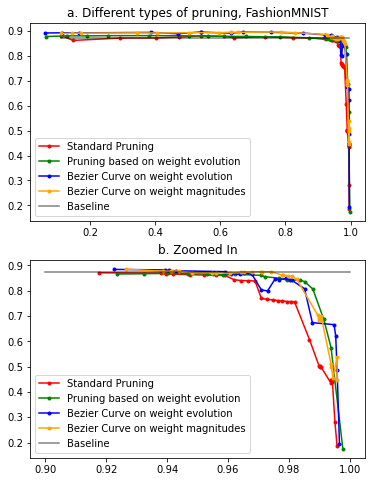

In [69]:
fig, axs = plt.subplots(2, 1,figsize=(6, 8))


xs=df_snhn_filtered["compression"].values
ys=df_snhn_filtered["top_1"].values
axs[0].plot(xs,ys,marker='.',color="red",label="Standard Pruning")



xs=df_mean_wt_best_manual["compression"]
ys=df_mean_wt_best_manual["val_top_1"]
axs[0].plot(xs,ys,marker='.',color="green", label = "Pruning based on weight evolution")


xs=df_bez_mean_best_manual["compression"]
ys=df_bez_mean_best_manual["val_top_1"]
axs[0].plot(xs,ys,marker='.',color="blue", label = "Bezier Curve on weight evolution")


xs=df_bez_actual_best_manual["compression"]
ys=df_bez_actual_best_manual["val_top_1"]
axs[0].plot(xs,ys,marker='.',color="orange", label = "Bezier Curve on weight magnitudes")


ys_baseline=[baseline_accuracy for i in range(len(xs))]
axs[0].plot(xs,ys_baseline,color="black", label = "Baseline",alpha=0.5)


axs[0].set_title("a. Different types of pruning, FashionMNIST")
axs[0].legend()

########################################################
########################################################
########################################################

# now go for zoom

left=0.9
right=1

xs=df_snhn_filtered["compression"].values
ys=df_snhn_filtered["top_1"].values
ys=ys[xs>=left]
xs=xs[xs>=left]
ys=ys[xs<=right]
xs=xs[xs<=right]
axs[1].plot(xs,ys,marker='.',color="red",label="Standard Pruning")



xs=df_mean_wt_best_manual["compression"]
ys=df_mean_wt_best_manual["val_top_1"]
ys=ys[xs>=left]
xs=xs[xs>=left]
ys=ys[xs<=right]
xs=xs[xs<=right]
axs[1].plot(xs,ys,marker='.',color="green", label = "Pruning based on weight evolution")



xs=df_bez_mean_best_manual["compression"]
ys=df_bez_mean_best_manual["val_top_1"]
ys=ys[xs>=left]
xs=xs[xs>=left]
ys=ys[xs<=right]
xs=xs[xs<=right]
axs[1].plot(xs,ys,marker='.',color="blue", label = "Bezier Curve on weight evolution")



xs=df_bez_actual_best_manual["compression"]
ys=df_bez_actual_best_manual["val_top_1"]
ys=ys[xs>=left]
xs=xs[xs>=left]
ys=ys[xs<=right]
xs=xs[xs<=right]
axs[1].plot(xs,ys,marker='.',color="orange", label = "Bezier Curve on weight magnitudes")

xs_baseline=list(np.linspace(left,right,num=10))
ys_baseline=[baseline_accuracy for i in range(len(xs_baseline))]
axs[1].plot(xs_baseline,ys_baseline,color="black", label = "Baseline",alpha=0.5)



axs[1].set_title("b. Zoomed In")
axs[1].legend()

fig.savefig("images/Complete_Zoomed_FashionMNIST.svg")
fig.savefig("images/Complete_Zoomed_FashionMNIST.png",facecolor="white", edgecolor='none')
fig.show()

